In [1]:
import os
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
from matplotlib import colors as mcolors
import pandas as pd
%matplotlib widget

In [2]:
# read and plot the DNA trace calculated from force measurement (1_CalculatingDNApTrace_OT.py)
trace_name = input('please type in the file name:' ) + '.xlsx'
trace_path = input('please type in the file path:')
trace_file = os.path.join(trace_path, trace_name) 
trace = pd.read_excel(trace_file)
print(trace.head())

please type in the file name: force data-cycle#01-processedData
please type in the file path: D:\Google Drive\private folder（work with MAtthew）\Project2_Watching labelled DNAP replication\20190529-012-very typical


   Unnamed: 0   time  ssDNA_all_percentage  junction_position_all    basepairs
0           0  10709              0.016578               0.078180  8253.857005
1           1  10755              0.014187               0.066903  8273.928526
2           2  10801              0.015218               0.071764  8265.275851
3           3  10845              0.013262               0.062542  8281.689794
4           4  10891              0.015231               0.071826  8265.165989


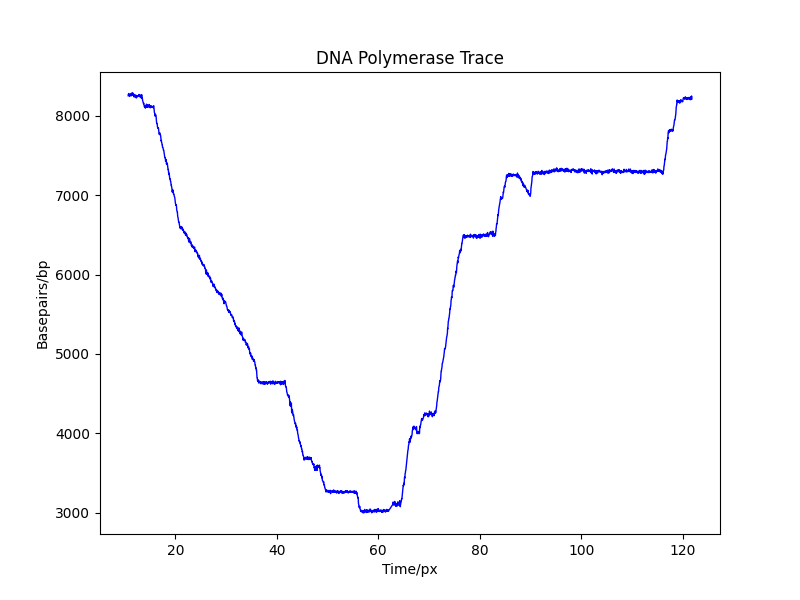

In [3]:

trace_time = trace['time']/1000 
trace_time = trace_time.dropna()
basepairs = pd.to_numeric(trace['basepairs'], errors='coerce') 
basepairs = basepairs.dropna()

plt.figure(figsize=(8,6))
plt.plot(trace_time,basepairs,'b',linewidth = 1)
plt.xlabel("Time/px")
plt.ylabel("Basepairs/bp")
plt.title("DNA Polymerase Trace")
# plt.ylim(25,85)
# plt.legend()
plt.show()
# plt.savefig(kymo_path  + '-cycle' + kymo_cycle +'-overlap'+'.png', dpi=150)

In [4]:
# read and plot the change-point calculated from the Matlab code
cp_name = input('please type in the file name:' ) + '.xlsx'
cp_path = input('please type in the file path:')
cp_file = os.path.join(cp_path, cp_name) 
cp = pd.read_excel(cp_file)
print(cp.head())

please type in the file name: force data-cycle#01-processedData_WindowSize_6SigmaValue =0.04
please type in the file path: C:\Users\Stefan\Desktop\test_Results


   cp_startIndex  cp_endIndex
0              0           57
1             57           70
2             70          106
3            106          109
4            109          197


In [6]:
cp_startTime = np.array(trace_time[cp['cp_startIndex']])
cp_endTime = np.array(trace_time[cp['cp_endIndex']])
cp_startBasepair = np.array(basepairs[cp['cp_startIndex']])
cp_endBasepair = np.array(basepairs[cp['cp_endIndex']])
cp_data = np.stack((cp_startTime, cp_startBasepair, cp_endTime, cp_endBasepair)).T
cp_data = cp_data.reshape (len(cp_startTime),4)
cp_data = cp_data.reshape((cp_data.shape[0], 2, 2))
segments = tuple(map(tuple, cp_data))
# print(segments)

((array([  10.709     , 8253.85700502]), array([  13.317    , 8243.3544331])), (array([  13.317    , 8243.3544331]), array([  13.911     , 8114.09610253])), (array([  13.911     , 8114.09610253]), array([  15.558     , 8116.70380162])), (array([  15.558     , 8116.70380162]), array([  15.696     , 8122.93765585])), (array([  15.696     , 8122.93765585]), array([  19.722     , 7015.25302512])), (array([  19.722     , 7015.25302512]), array([  20.776     , 6635.64532901])), (array([  20.776     , 6635.64532901]), array([  34.32      , 5092.76871389])), (array([  34.32      , 5092.76871389]), array([  35.739     , 4857.22580762])), (array([  35.739     , 4857.22580762]), array([  36.197     , 4668.30119175])), (array([  36.197     , 4668.30119175]), array([  36.333     , 4666.77297498])), (array([  36.333     , 4666.77297498]), array([  41.596     , 4665.35736975])), (array([  41.596     , 4665.35736975]), array([  45.212     , 3721.96817141])), (array([  45.212     , 3721.96817141]), arr

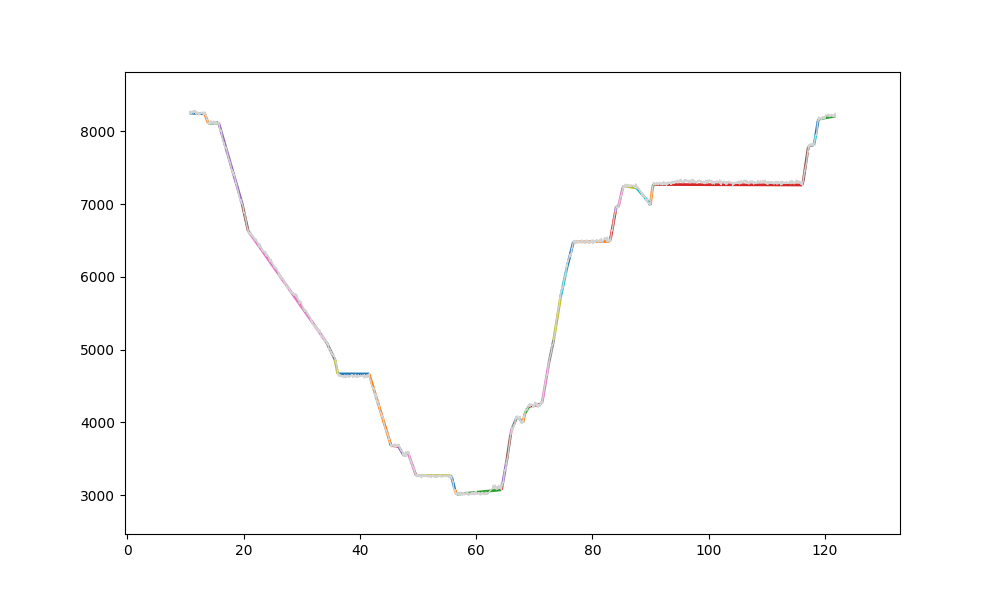

In [7]:
# colors is sequence of rgba tuples
# linestyle is a string or dash tuple. Legal string values are
#          solid|dashed|dashdot|dotted.  The dash tuple is (offset, onoffseq)
#          where onoffseq is an even length tuple of on and off ink in points.
#          If linestyle is omitted, 'solid' is used
# See :class:`matplotlib.collections.LineCollection` for more information
colors = [mcolors.to_rgba(c)
          for c in plt.rcParams['axes.prop_cycle'].by_key()['color']]


lc = mc.LineCollection(segments, colors=colors, linewidths=2)
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(trace_time,basepairs,'lightgray',linewidth = 1)
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)
plt.show()